In [2]:
library(dplyr)
summary(mtcars)

mpg cyl disp hp 
 Min. :10.40 Min. :4.000 Min. : 71.1 Min. : 52.0 
 1st Qu.:15.43 1st Qu.:4.000 1st Qu.:120.8 1st Qu.: 96.5 
 Median :19.20 Median :6.000 Median :196.3 Median :123.0 
 Mean :20.09 Mean :6.188 Mean :230.7 Mean :146.7 
 3rd Qu.:22.80 3rd Qu.:8.000 3rd Qu.:326.0 3rd Qu.:180.0 
 Max. :33.90 Max. :8.000 Max. :472.0 Max. :335.0 
 drat wt qsec vs 
 Min. :2.760 Min. :1.513 Min. :14.50 Min. :0.0000 
 1st Qu.:3.080 1st Qu.:2.581 1st Qu.:16.89 1st Qu.:0.0000 
 Median :3.695 Median :3.325 Median :17.71 Median :0.0000 
 Mean :3.597 Mean :3.217 Mean :17.85 Mean :0.4375 
 3rd Qu.:3.920 3rd Qu.:3.610 3rd Qu.:18.90 3rd Qu.:1.0000 
 Max. :4.930 Max. :5.424 Max. :22.90 Max. :1.0000 
 am gear carb 
 Min. :0.0000 Min. :3.000 Min. :1.000 
 1st Qu.:0.0000 1st Qu.:3.000 1st Qu.:2.000 
 Median :0.0000 Median :4.000 Median :2.000 
 Mean :0.4062 Mean :3.688 Mean :2.812 
 3rd Qu.:1.0000 3rd Qu.:4.000 3rd Qu.:4.000 
 Max. :1.0000 Max. :5.000 Max. :8.000

In [9]:
install.packages("caTools")
install.packages("ROCR")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘gtools’, ‘KernSmooth’, ‘gplots’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [10]:
library("caTools")
library("ROCR")

In [11]:
split<-sample.split(mtcars,SplitRatio = 0.8)
split

FALSE FALSE TRUE TRUE TRUE TRUE TRUE TRUE TRUE FALSE TRUE

In [12]:
train_reg<-subset(mtcars,split=="TRUE")
test_reg<-subset(mtcars,split=="FALSE")

In [13]:
#przygotowanie modelu
logistic_model<-glm(vs~wt+disp,
                    data=train_reg,
                    family='binomial')

logistic_model


Call:  glm(formula = vs ~ wt + disp, family = "binomial", data = train_reg)

Coefficients:
(Intercept)           wt         disp  
    1.84271      1.47488     -0.03005  

Degrees of Freedom: 22 Total (i.e. Null);  20 Residual
Null Deviance:	    31.84 
Residual Deviance: 14.44 	AIC: 20.44

In [14]:
summary(logistic_model)


Call:
glm(formula = vs ~ wt + disp, family = "binomial", data = train_reg)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8760  -0.2321  -0.1416   0.4856   1.6966  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  1.84271    2.80983   0.656   0.5119  
wt           1.47488    1.70384   0.866   0.3867  
disp        -0.03005    0.01549  -1.941   0.0523 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 31.841  on 22  degrees of freedom
Residual deviance: 14.435  on 20  degrees of freedom
AIC: 20.435

Number of Fisher Scoring iterations: 6


In [15]:
predict_reg<-predict(logistic_model,test_reg,type = 'response')
predict_reg

Mazda RX4 0.710710884120974 Mazda RX4 Wag 0.781586014269489 Merc 280 0.86759461385112 Merc 450SE 0.39116514363205 Merc 450SL 0.280118148694339 Toyota Corona 0.866370489504813 AMC Javelin 0.0974060883883797 Camaro Z28 0.0469146687129674 Volvo 142E 0.90943722104838

In [16]:
predict_reg<-ifelse(predict_reg>0.5,1,0)
table(test_reg$vs,predict_reg)

predict_reg
 0 1
 0 4 2
 1 0 3

In [17]:
missing_classerr<-mean(predict_reg!=test_reg$vs)
print(paste('Accuracy = ',1-missing_classerr))

[1] "Accuracy =  0.777777777777778"


In [20]:
ROCPred<-prediction(predict_reg,test_reg$vs)
ROCPer<-performance(ROCPred,measure="tpr",x.measure = "fpr")
auc<-performance(ROCPred,measure="auc")
auc<-auc@y.values[[1]]
auc

0.833333333333333

AUC - Area under the curve
ROC - Receiver operating characteristic

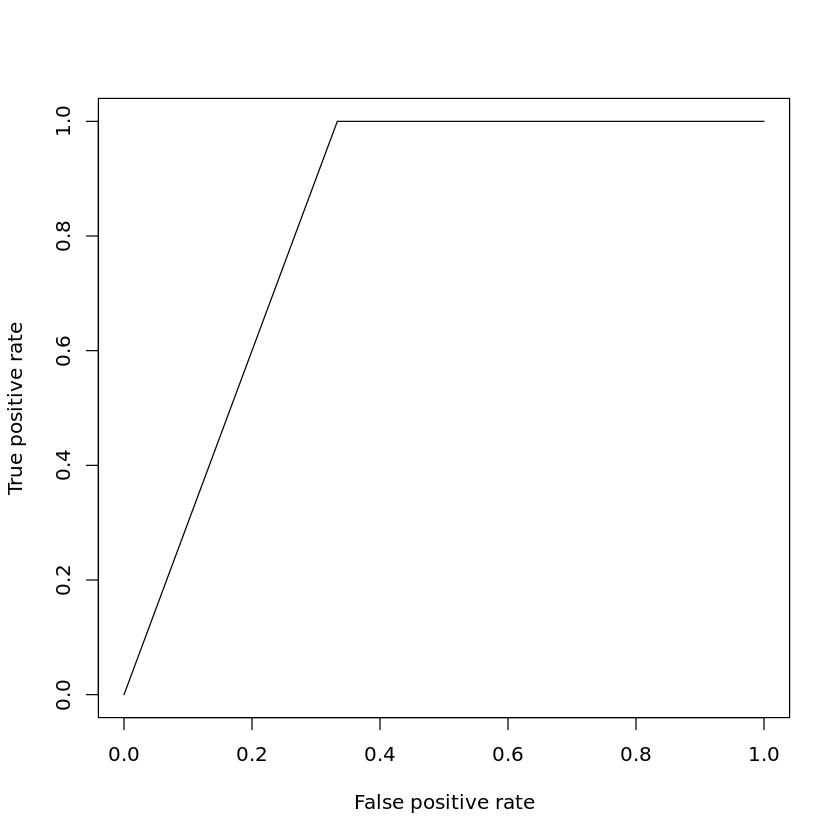

In [21]:
plot(ROCPer)

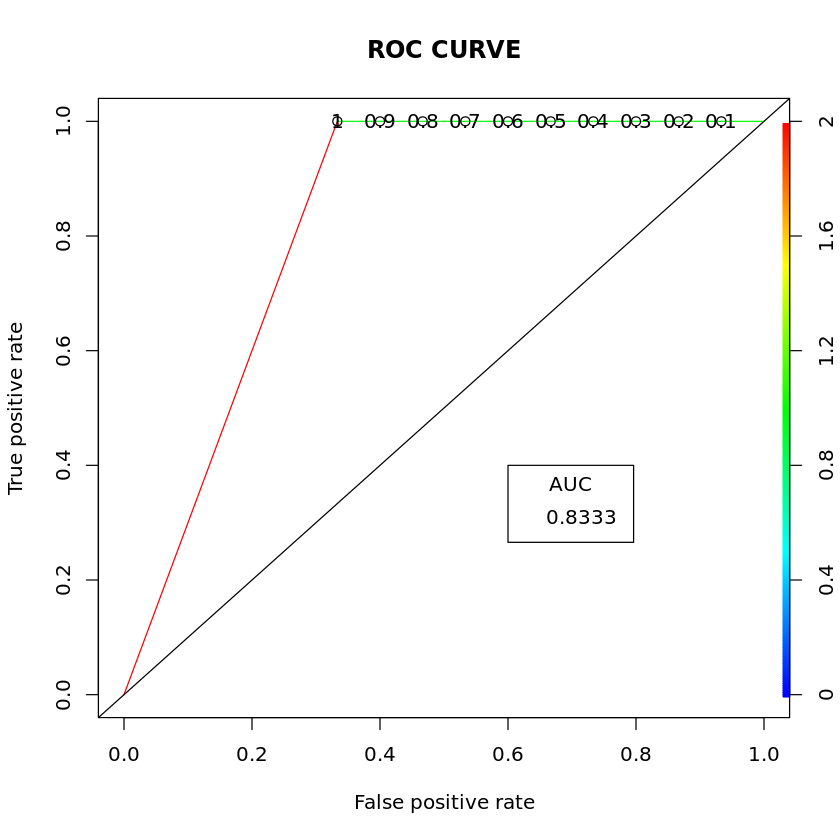

In [22]:
plot(ROCPer,colorize = TRUE,
print.cutoffs.at=seq(0.1,by = 0.1),
main="ROC CURVE")
abline(a=0,b=1)

auc<-round(auc,4)
legend(.6,.4,auc,title='AUC', cex=1)